In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from scipy.fft import fft, fftfreq
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns


In [2]:
def cov_auto_samp(X,delta):
    N = len(X)
    Xs = np.average(X)
    autoCov = 0.0
    times = 0.0
    for i in np.arange(0, N-delta):
        autoCov += (X[i+delta]-Xs)*(X[i]-Xs)
        times +=1
    return autoCov/times

In [2]:
caminho_conjunto_original = "C:\mestrado\Pesquisa\Dados reais\Dados brutos\Amazon\AMZN.csv"
df = pd.read_csv(caminho_conjunto_original)
df['Date'] = pd.to_datetime(df['Date'].values)

In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

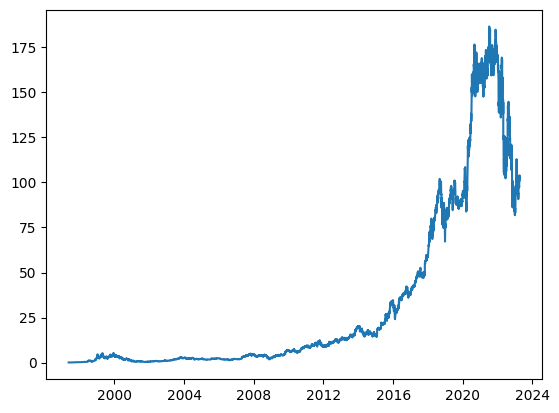

In [4]:
plt.plot(df['Date'], df['Close'])

Média: 31.59973960620012
Mediana: 6.44425
Variância: 2309.433947568942
Assimetria: 1.6988880680904794
Curtose: 1.6891487865836474
Mínimo: 0.069792
Máximo: 186.570496


(array([4432.,  405.,  317.,   95.,  402.,  252.,  117.,   65.,  302.,
         129.]),
 array([6.97920000e-02, 1.87198624e+01, 3.73699328e+01, 5.60200032e+01,
        7.46700736e+01, 9.33201440e+01, 1.11970214e+02, 1.30620285e+02,
        1.49270355e+02, 1.67920426e+02, 1.86570496e+02]),
 <BarContainer object of 10 artists>)

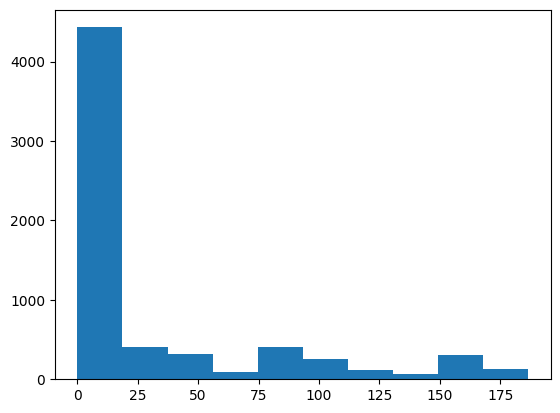

In [20]:
print('Média:', np.mean(df['Close']))
print('Mediana:', np.median(df['Close']))
print('Variância:', np.var(df['Close']))
print('Assimetria:', scipy.stats.skew(df['Close']))
print('Curtose:', scipy.stats.kurtosis(df['Close']))
print('Mínimo:', np.min(df['Close']))
print('Máximo:', np.max(df['Close']))
plt.hist(df['Close'])

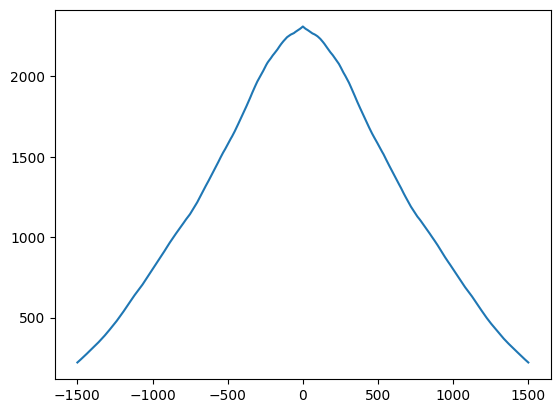

In [28]:
plt.plot(range(-1500,1501), [cov_auto_samp(df['Close'].values, np.abs(delta)) for delta in range(-1500,1501)])

In [6]:
print(max(df['Date']))

2023-04-05 00:00:00


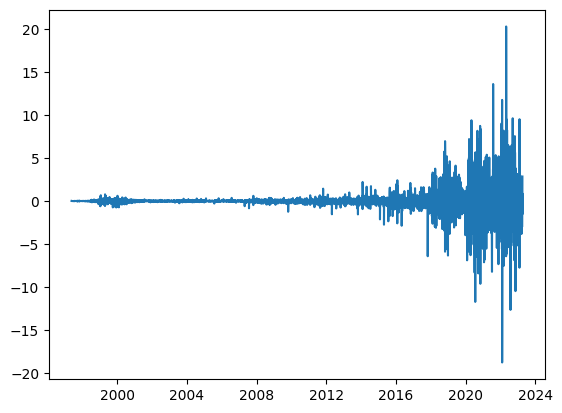

In [7]:
diff_1 = df['Close'].values[:-1] - df['Close'].values[1:]
plt.plot(df['Date'].values[1:], diff_1)

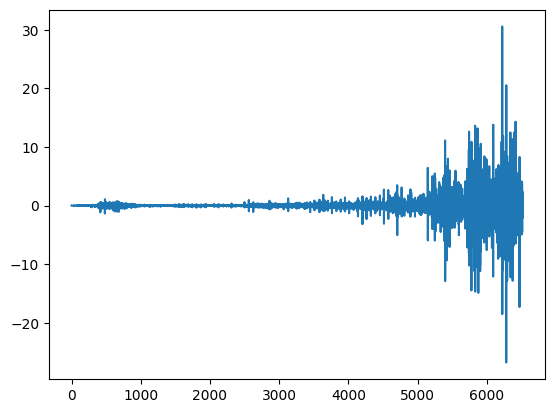

In [8]:
diff_2 = diff_1[:-1] - diff_1[1:]
plt.plot(diff_2)

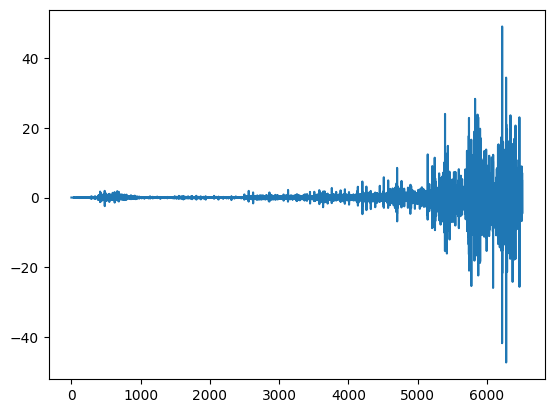

In [9]:
diff_3 = diff_2[:-1] - diff_2[1:]
plt.plot(diff_3)

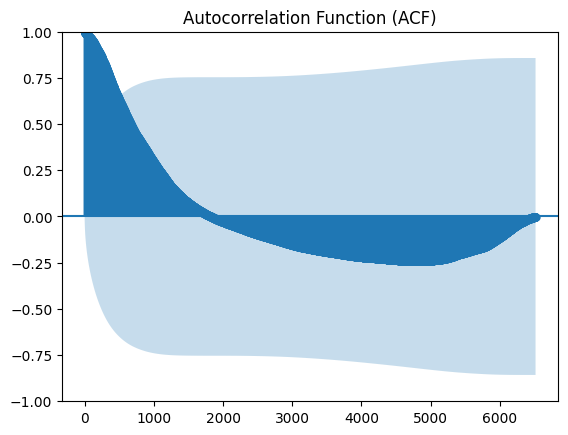

In [10]:
plot_acf(df['Close'], lags=df.shape[0]-1)  # Ajuste o número de lags conforme necessário
plt.title('Autocorrelation Function (ACF)')
plt.show()

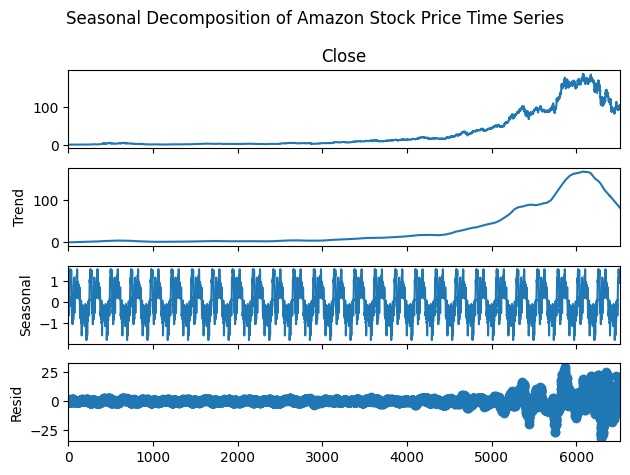

In [11]:
# df['Date'] = pd.to_datetime(df['Date'].values)
result = seasonal_decompose(df['Close'], model='additive', extrapolate_trend='freq', period=12*4*5)
result.plot()
plt.suptitle('Seasonal Decomposition of Amazon Stock Price Time Series')
plt.tight_layout()
plt.show()

In [6]:
# df['Date'] = pd.to_datetime(df['Date'].values)
result = seasonal_decompose(df['Close'], model='multiplicative', extrapolate_trend='freq', period=12*4*5)
result.plot()
plt.suptitle('Seasonal Decomposition of Amazon Stock Price Time Series')
plt.tight_layout()
plt.show()

In [7]:
# Plot the trend component
plt.figure(figsize=(6, 4))
plt.plot(df['Date'], result.trend, label='Trend Component')
plt.title('Trend Component of Amazon Stock Price Time Series')
plt.xlabel('Year')
plt.ylabel('Trend Component')
plt.legend()
plt.show()

In [8]:
# Plot the seasonal component
%matplotlib qt
plt.figure(figsize=(6, 4))
plt.plot(df['Date'], result.seasonal, label='Seasonal Component')
plt.title('Seasonal Component of Amazon Stock Price Time Series')
plt.xlabel('Year')
plt.ylabel('Seasonal Component')
plt.legend()
plt.show()

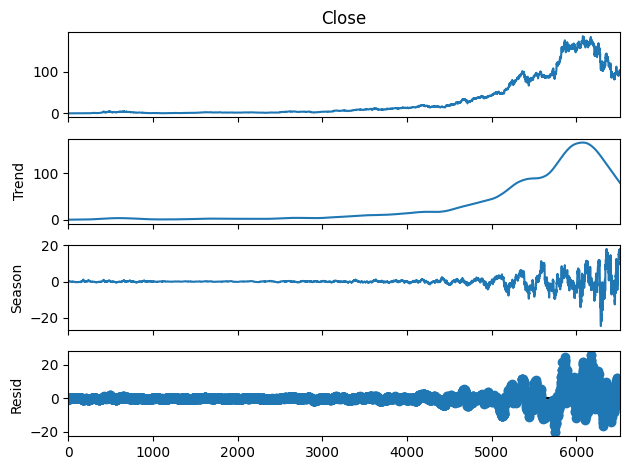

In [15]:
stl = STL(df['Close'], period=240)  # Substitua por períodos alternativos conforme necessário
result = stl.fit()
result.plot()
plt.show()

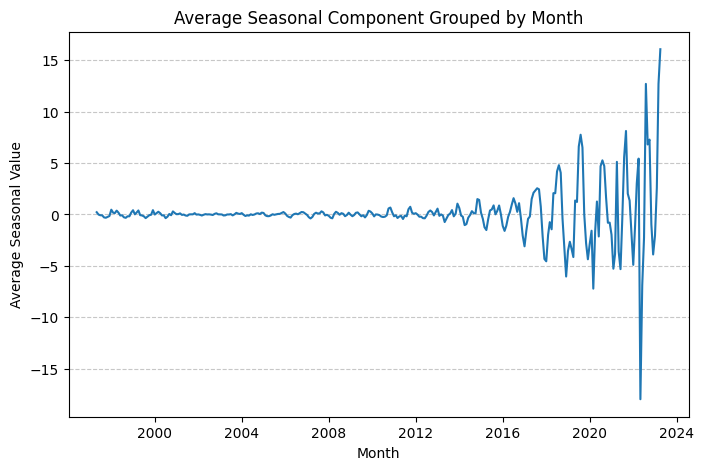

In [16]:
seasonal_df = pd.DataFrame({'Date': df['Date'].dt.to_period('M'), 'Seasonal': result.seasonal})
monthly_avg_seasonal = seasonal_df.groupby('Date')['Seasonal'].mean()
plt.figure(figsize=(8, 5))
plt.plot(monthly_avg_seasonal.index.to_timestamp(), monthly_avg_seasonal.values, label='Seasonal Component')
plt.title('Average Seasonal Component Grouped by Month')
plt.xlabel('Month')
plt.ylabel('Average Seasonal Value')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
monthly_avg_seasonal.values

array([ 2.17066363e-01, -1.44161210e-02, -7.99157717e-02, -8.66276086e-02,
       -2.89202031e-01, -3.22344132e-01, -2.29837244e-01, -1.52281482e-01,
        4.62960305e-01,  1.71256938e-01,  1.24532357e-01,  3.70648271e-01,
        1.78879415e-01, -1.04350799e-01, -8.00916767e-02, -2.79212657e-01,
       -3.28539192e-01, -1.80757697e-01, -1.80665288e-01,  1.76272808e-01,
        4.09948106e-01,  1.27206440e-02,  1.78340546e-01,  3.86812241e-01,
       -6.85759540e-02, -9.96086644e-02, -1.78602435e-01, -3.57445655e-01,
       -2.16978941e-01, -7.53013944e-02, -2.76895748e-02,  4.18071047e-01,
       -9.86500787e-03,  1.34209652e-01,  2.61559216e-01,  1.21868615e-01,
       -9.42067849e-02, -8.28902123e-02, -3.61442510e-01, -2.21406904e-01,
        4.41076064e-02, -7.67617856e-02,  2.98579373e-01,  1.40299146e-01,
        2.32351573e-02,  3.55998100e-02,  1.05230059e-01, -4.62117459e-02,
       -1.14571671e-02, -1.03784076e-01, -1.31760136e-01,  2.81311635e-03,
        1.24091868e-02,  

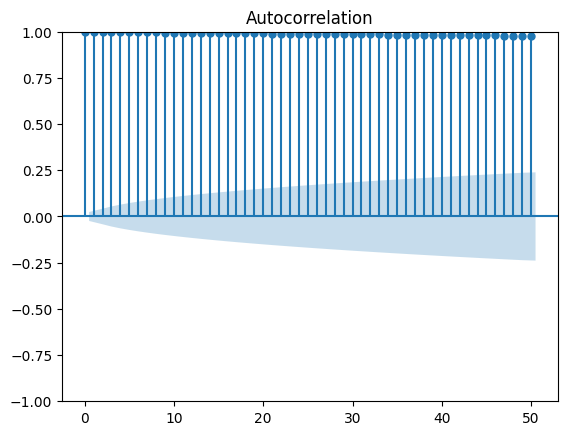

In [18]:
plot_acf(df['Close'], lags=50)  # Ajuste o número de lags conforme necessário
plt.show()

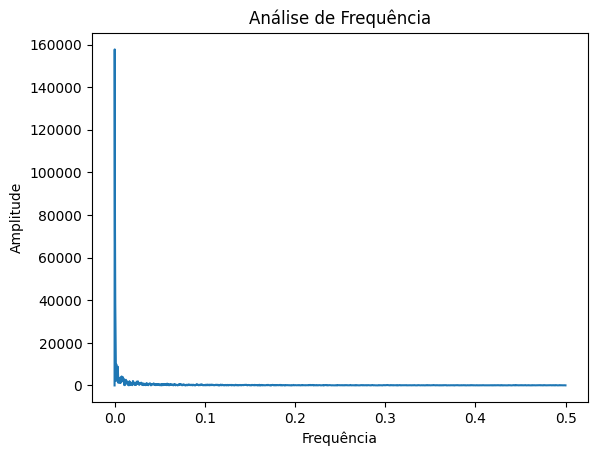

In [19]:
n = len(df['Close'].values)
yf = fft(df['Close'].values - np.mean(df['Close']))  # Remova a média para evitar interferência
xf = fftfreq(n, d=1)  # d=1 assume intervalos regulares de tempo

plt.plot(xf[:n//2], np.abs(yf[:n//2]))  # Use apenas a metade positiva do espectro
plt.title("Análise de Frequência")
plt.xlabel("Frequência")
plt.ylabel("Amplitude")
plt.show()

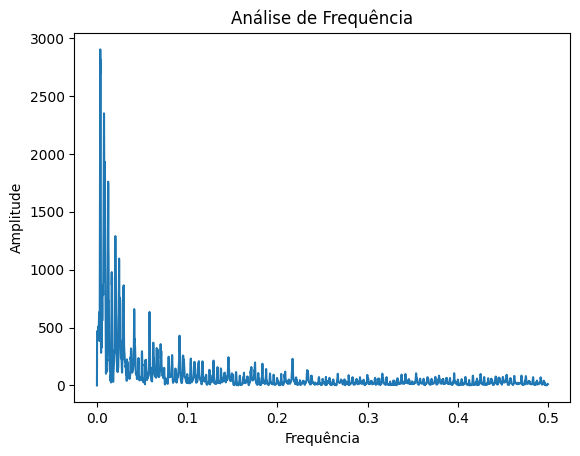

In [20]:
n = len(result.seasonal.values)
yf = fft(result.seasonal.values - np.mean(result.seasonal.values))  # Remova a média para evitar interferência
xf = fftfreq(n, d=1)  # d=1 assume intervalos regulares de tempo

plt.plot(xf[:n//2], np.abs(yf[:n//2]))  # Use apenas a metade positiva do espectro
plt.title("Análise de Frequência")
plt.xlabel("Frequência")
plt.ylabel("Amplitude")
plt.show()

In [21]:
1/(11*30)

0.0030303030303030303

In [22]:
1/xf[list(yf).index(max(yf))]

130.32000000000002

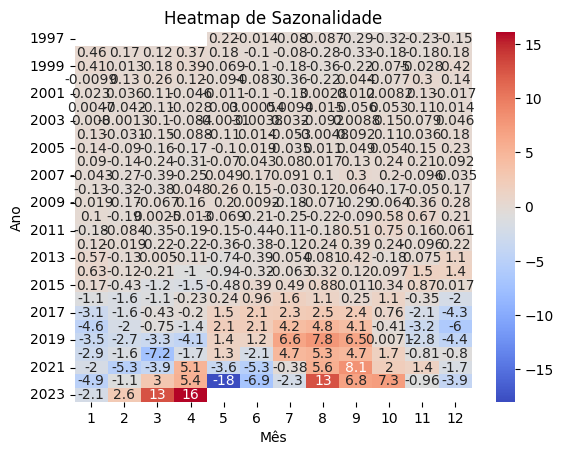

In [23]:
# Converta para DataFrame com ano e mês
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['month unique'] = df['year']*12+df['month']
df['Componente Sazonal'] = result.seasonal.values
pivot = df.pivot_table(values='Componente Sazonal', columns='month', index='year')

sns.heatmap(pivot, cmap='coolwarm', annot=True)
plt.title("Heatmap de Sazonalidade")
plt.xlabel("Mês")
plt.ylabel("Ano")
plt.show()


In [24]:
df[['Close']].set_index(df['Date'])

,Close
Date,
1997-05-15,0.097917
1997-05-16,0.086458
1997-05-19,0.085417
1997-05-20,0.081771
1997-05-21,0.071354
...,...
2023-03-30,102.000000
2023-03-31,103.290001
2023-04-03,102.410004


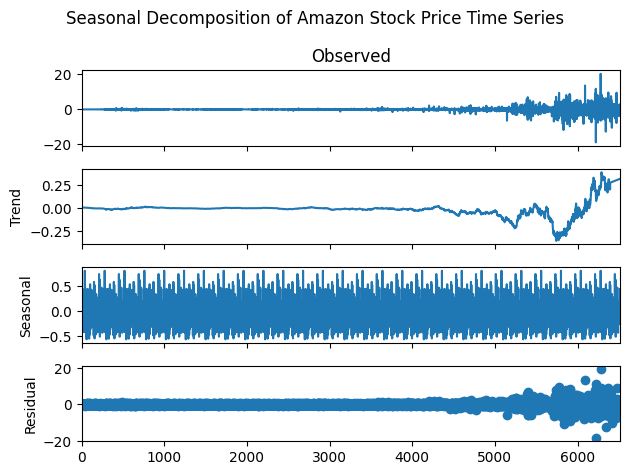

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
result = seasonal_decompose(diff_1, model='additive', extrapolate_trend='freq', period=12*4*5)
result.plot()
plt.suptitle('Seasonal Decomposition of Amazon Stock Price Time Series')
plt.tight_layout()
plt.show()

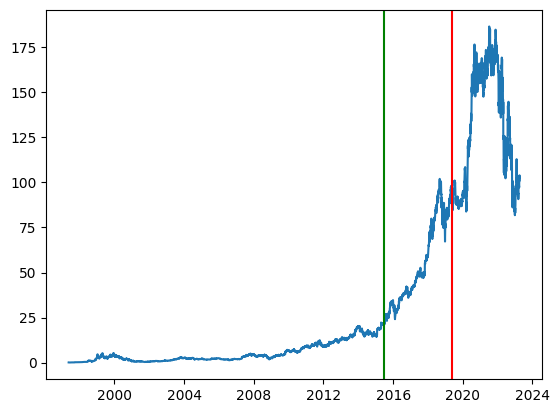

In [26]:
plt.figure()
plt.plot(df['Date'], df['Close'])
plt.axvline(df['Date'].iloc[int(df.shape[0]*0.7)], color='green')
plt.axvline(df['Date'].iloc[int(df.shape[0]*0.85)], color='red')

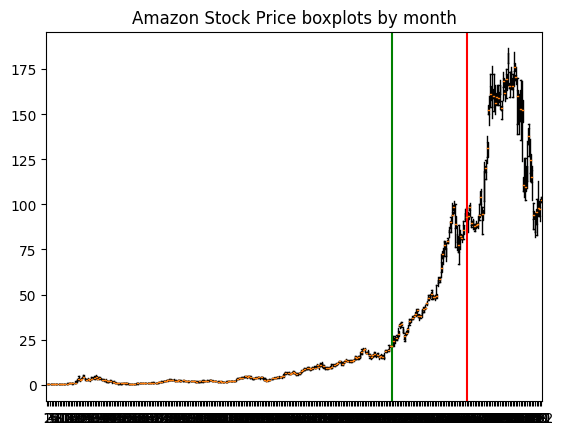

In [27]:
pasta_agrupado = r"C:\mestrado\Pesquisa\Dados reais\Dados tratados\Amazon\agrupado em boxplots"
train_df=pd.read_csv(f"{pasta_agrupado}/train.csv")
train_df['Date'] = pd.to_datetime(train_df['Date'].values)
val_df=pd.read_csv(f"{pasta_agrupado}/val.csv")
val_df['Date'] = pd.to_datetime(val_df['Date'].values)
test_df=pd.read_csv(f"{pasta_agrupado}/test.csv")
test_df['Date'] = pd.to_datetime(test_df['Date'].values)
def plot_single_box_plot_series(box_plot_series, splitters=[], title=''):
    fig, ax = plt.subplots()
    if title != '':
        ax.set_title(title)
    ax.bxp(box_plot_series, showfliers=False)
    if splitters:
        if len(splitters) <= 3:
            colors = ['green', 'red', 'blue']
        else:
            colors = ['red'] * len(splitters)
        for i, splitter in enumerate(splitters):
            ax.axvline(splitter, color=colors[i])
    plt.show()
plot_single_box_plot_series(pd.concat([train_df[["whishi","q3","med","q1","whislo"]], val_df[["whishi","q3","med","q1","whislo"]], test_df[["whishi","q3","med","q1","whislo"]]]).to_dict('records'), splitters=[train_df.shape[0], train_df.shape[0]+val_df.shape[0]], title="Amazon Stock Price boxplots by month")

In [28]:
train_df.columns

Index(['Date', 'whislo', 'q1', 'med', 'q3', 'whishi'], dtype='object')

POLUIÇÃO EM BEIJING

In [3]:
caminho_conjunto_original = r"C:\mestrado\Pesquisa\Dados reais\Dados brutos\beijing\PM2.5\data.csv"
df = pd.read_csv(caminho_conjunto_original)
df = df[~pd.isna(df['pm2.5'])]
df['Date'] = pd.to_datetime(df[['year','month','day', 'hour']].astype(str).apply(lambda x: x['year']+'-'+x['month']+'-'+x['day']+' '+x['hour']+'h', axis=1))

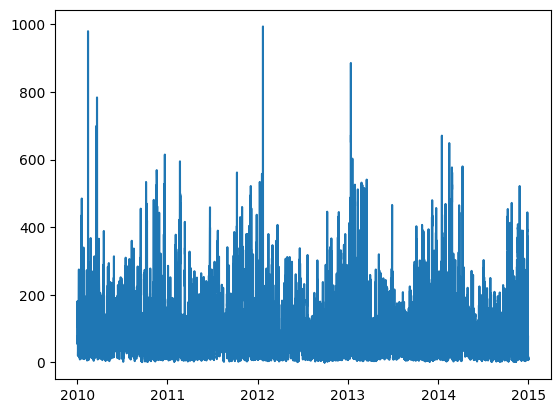

In [4]:
plt.plot(df['Date'], df['pm2.5'])

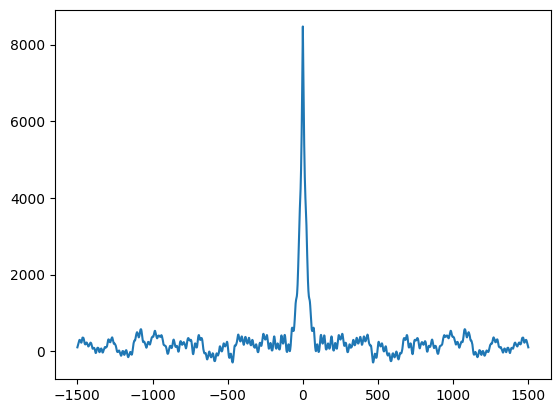

In [7]:
plt.plot(range(-1500,1501), [cov_auto_samp(df['pm2.5'].values, np.abs(delta)) for delta in range(-1500,1501)])

In [32]:
import numpy as np
dates_to_values = {}
for date in df[['month', 'day', 'hour']].astype(str).apply(lambda x: '-'.join(x), axis=1).unique():
    dates_to_values[date] = list(df[df[['month', 'day', 'hour']].astype(str).apply(lambda x: '-'.join(x), axis=1) == date]['pm2.5'].reset_index(drop=True).values)


<Figure size 640x480 with 0 Axes>

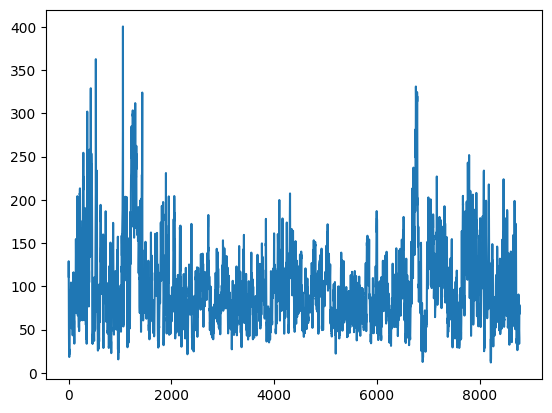

In [33]:
plt.plot([np.mean(v) for k, v in sorted(dates_to_values.items(), key=lambda x: int(x[0].split('-')[2])+24*int(x[0].split('-')[1])+24*31*int(x[0].split('-')[0]))])

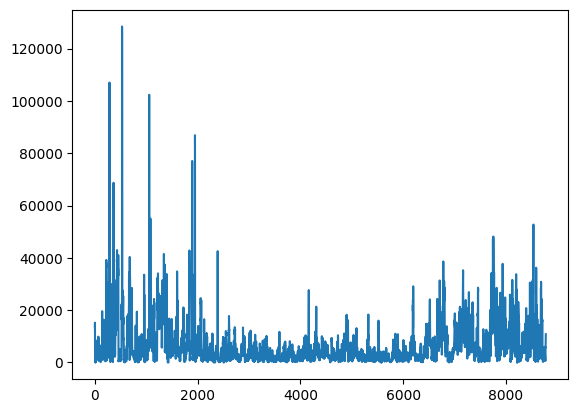

In [34]:
plt.plot([np.var(v) for k, v in sorted(dates_to_values.items(), key=lambda x: int(x[0].split('-')[2])+24*int(x[0].split('-')[1])+24*31*int(x[0].split('-')[0]))])

Média: 98.61321455085375
Mediana: 72.0
Variância: 8473.070863045978
Assimetria: 1.8022466754707596
Curtose: 4.768218621208263
Mínimo: 0.0
Máximo: 994.0


(array([2.6195e+04, 1.0214e+04, 3.5510e+03, 1.2260e+03, 4.4100e+02,
        9.7000e+01, 1.5000e+01, 7.0000e+00, 8.0000e+00, 3.0000e+00]),
 array([  0. ,  99.4, 198.8, 298.2, 397.6, 497. , 596.4, 695.8, 795.2,
        894.6, 994. ]),
 <BarContainer object of 10 artists>)

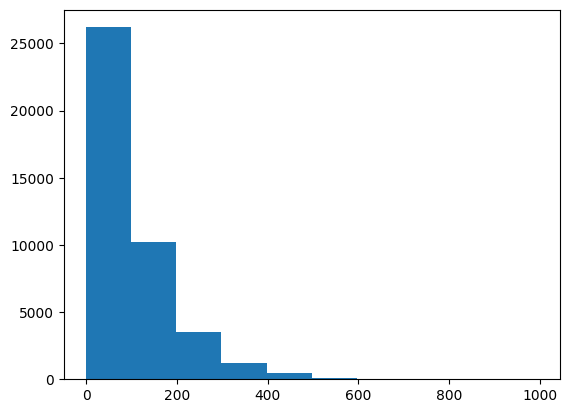

In [35]:
import scipy
print('Média:', np.mean(df['pm2.5']))
print('Mediana:', np.median(df['pm2.5']))
print('Variância:', np.var(df['pm2.5']))
print('Assimetria:', scipy.stats.skew(df['pm2.5']))
print('Curtose:', scipy.stats.kurtosis(df['pm2.5']))
print('Mínimo:', np.min(df['pm2.5']))
print('Máximo:', np.max(df['pm2.5']))
plt.hist(df['pm2.5'])

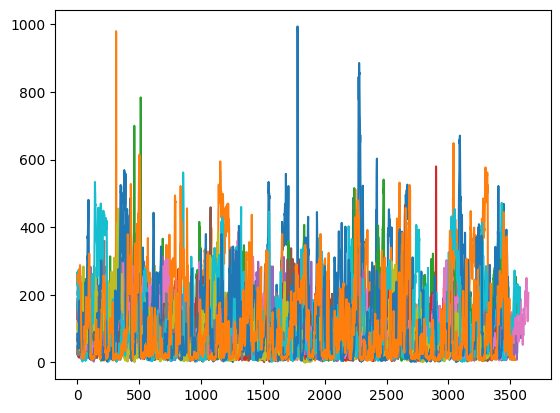

In [36]:
plt.figure()
for month in df['month'].unique():
    plt.plot(df[df['month']==month]['pm2.5'].reset_index(drop=True))

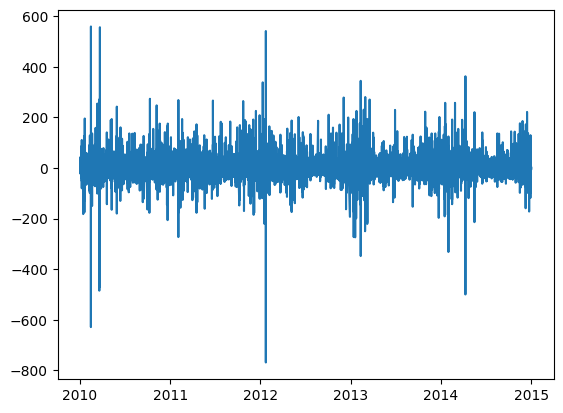

In [37]:
diff_1 = df['pm2.5'].values[:-1] - df['pm2.5'].values[1:]
plt.plot(df['Date'].values[1:], diff_1)

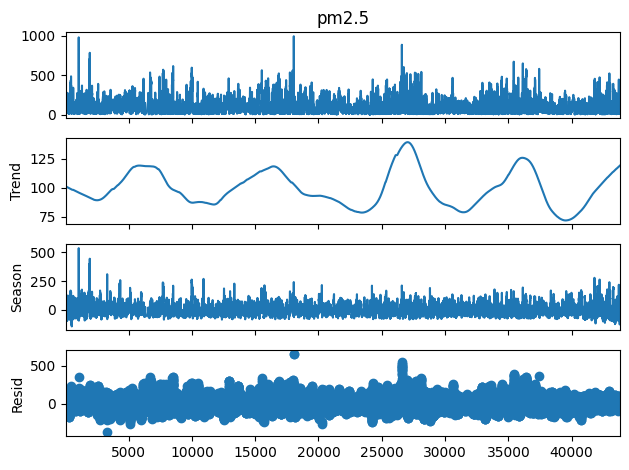

In [8]:
from statsmodels.tsa.seasonal import STL
stl = STL(df['pm2.5'], period=92*24)  # Substitua por períodos alternativos conforme necessário
result = stl.fit()
result.plot()
plt.show()

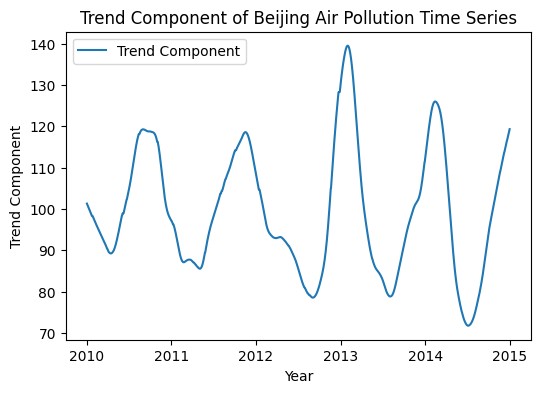

In [9]:
# Plot the trend component
plt.figure(figsize=(6, 4))
plt.plot(df['Date'], result.trend, label='Trend Component')
plt.title('Trend Component of Beijing Air Pollution Time Series')
plt.xlabel('Year')
plt.ylabel('Trend Component')
plt.legend()
plt.show()

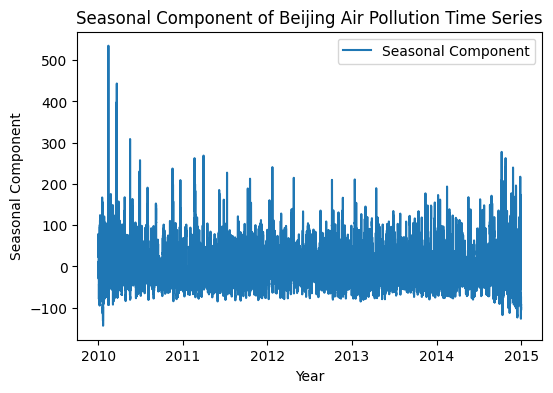

In [10]:
plt.figure(figsize=(6, 4))
plt.plot(df['Date'], result.seasonal, label='Seasonal Component')
plt.title('Seasonal Component of Beijing Air Pollution Time Series')
plt.xlabel('Year')
plt.ylabel('Seasonal Component')
plt.legend()
plt.show()

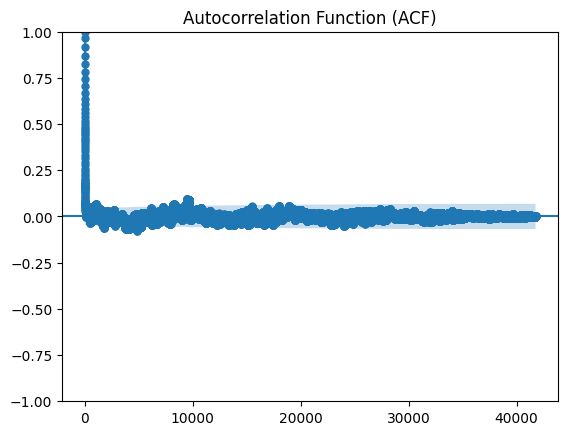

In [39]:
plot_acf(df['pm2.5'], lags=df.shape[0]-1)  # Ajuste o número de lags conforme necessário
plt.title('Autocorrelation Function (ACF)')
plt.show()

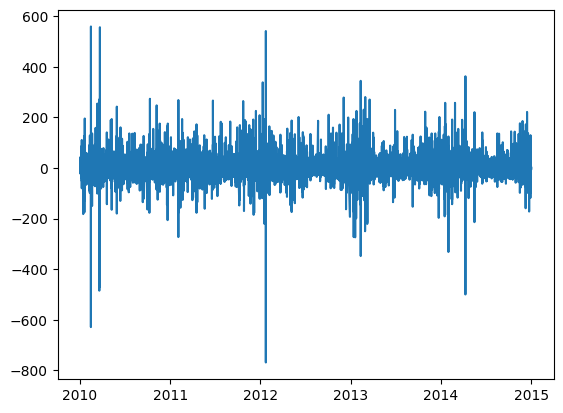

In [40]:
diff_1 = df['pm2.5'].values[:-1] - df['pm2.5'].values[1:]
plt.plot(df['Date'].values[1:], diff_1)

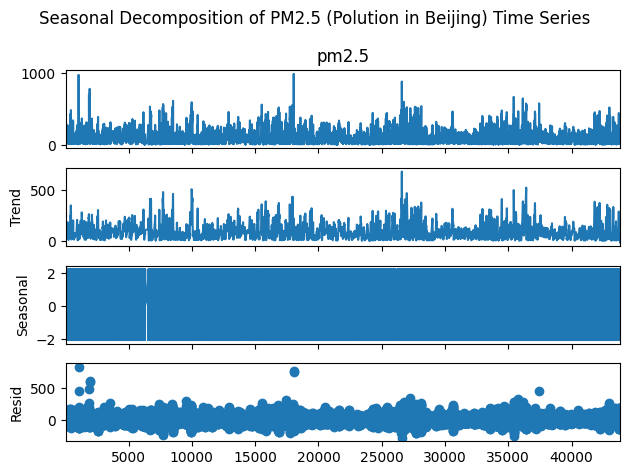

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
result = seasonal_decompose(df['pm2.5'], model='additive', extrapolate_trend='freq', period=22)
result.plot()
plt.suptitle('Seasonal Decomposition of PM2.5 (Polution in Beijing) Time Series')
plt.tight_layout()
plt.show()

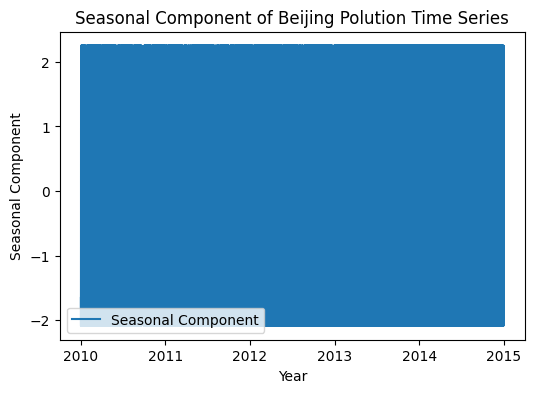

In [42]:
# Plot the seasonal component
plt.figure(figsize=(6, 4))
plt.plot(df['Date'], result.seasonal, label='Seasonal Component')
plt.title('Seasonal Component of Beijing Polution Time Series')
plt.xlabel('Year')
plt.ylabel('Seasonal Component')
plt.legend()
plt.show()

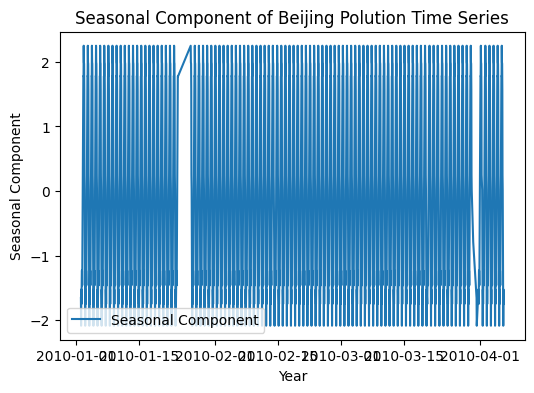

In [43]:
# Plot the seasonal component
# %matplotlib qt
plt.figure(figsize=(6, 4))
plt.plot(df['Date'].iloc[:24*90], result.seasonal[:24*90], label='Seasonal Component')
plt.title('Seasonal Component of Beijing Polution Time Series')
plt.xlabel('Year')
plt.ylabel('Seasonal Component')
plt.legend()
plt.show()

In [44]:
df['Date'].iloc[:24*30]

24    2010-01-02 00:00:00
25    2010-01-02 01:00:00
26    2010-01-02 02:00:00
27    2010-01-02 03:00:00
28    2010-01-02 04:00:00
              ...        
806   2010-02-03 14:00:00
807   2010-02-03 15:00:00
808   2010-02-03 16:00:00
809   2010-02-03 17:00:00
810   2010-02-03 18:00:00
Name: Date, Length: 720, dtype: datetime64[ns]

In [45]:
df['pm2.5']

24       129.0
25       148.0
26       159.0
27       181.0
28       138.0
         ...  
43819      8.0
43820     10.0
43821     10.0
43822      8.0
43823     12.0
Name: pm2.5, Length: 41757, dtype: float64

In [46]:
df['Date']

24      2010-01-02 00:00:00
25      2010-01-02 01:00:00
26      2010-01-02 02:00:00
27      2010-01-02 03:00:00
28      2010-01-02 04:00:00
                ...        
43819   2014-12-31 19:00:00
43820   2014-12-31 20:00:00
43821   2014-12-31 21:00:00
43822   2014-12-31 22:00:00
43823   2014-12-31 23:00:00
Name: Date, Length: 41757, dtype: datetime64[ns]

In [47]:
pd.Series(df['Date'].values[1:]-df['Date'].values[:-1]).value_counts()

0 days 01:00:00    41543
0 days 02:00:00      112
0 days 03:00:00       29
0 days 06:00:00        6
0 days 08:00:00        6
0 days 10:00:00        6
0 days 05:00:00        5
0 days 07:00:00        4
0 days 09:00:00        3
0 days 11:00:00        3
3 days 03:00:00        2
0 days 23:00:00        2
0 days 04:00:00        2
1 days 06:00:00        2
0 days 15:00:00        2
0 days 20:00:00        2
0 days 18:00:00        2
0 days 13:00:00        2
1 days 01:00:00        2
0 days 17:00:00        2
1 days 00:00:00        1
5 days 08:00:00        1
0 days 21:00:00        1
1 days 19:00:00        1
1 days 21:00:00        1
1 days 17:00:00        1
3 days 01:00:00        1
1 days 14:00:00        1
4 days 04:00:00        1
3 days 20:00:00        1
2 days 20:00:00        1
2 days 16:00:00        1
2 days 21:00:00        1
6 days 12:00:00        1
3 days 05:00:00        1
2 days 07:00:00        1
2 days 01:00:00        1
2 days 05:00:00        1
0 days 12:00:00        1
Name: count, dtype: int64

DEMANDA ENERGÉTICA

In [3]:
import os
pasta_dos_dados = "C:/mestrado/Pesquisa/Dados reais/Dados brutos/demanda energética - kaggle"
df = pd.DataFrame()
for csv_name in os.listdir(pasta_dos_dados):
    df = pd.concat([df, pd.read_csv(f"{pasta_dos_dados}/{csv_name}")]).reset_index(drop=True)

In [4]:
df

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,2018/01/01 00:30:00,6912.25,91.86,TRADE
1,NSW1,2018/01/01 01:00:00,6745.63,88.83,TRADE
2,NSW1,2018/01/01 01:30:00,6466.06,73.62,TRADE
3,NSW1,2018/01/01 02:00:00,6279.80,71.49,TRADE
4,NSW1,2018/01/01 02:30:00,6177.31,69.27,TRADE
...,...,...,...,...,...
248587,NSW1,2023/06/27 23:40:00,8536.43,116.99,TRADE
248588,NSW1,2023/06/27 23:45:00,8527.02,89.00,TRADE
248589,NSW1,2023/06/27 23:50:00,8489.29,88.88,TRADE
248590,NSW1,2023/06/27 23:55:00,8358.07,61.74,TRADE


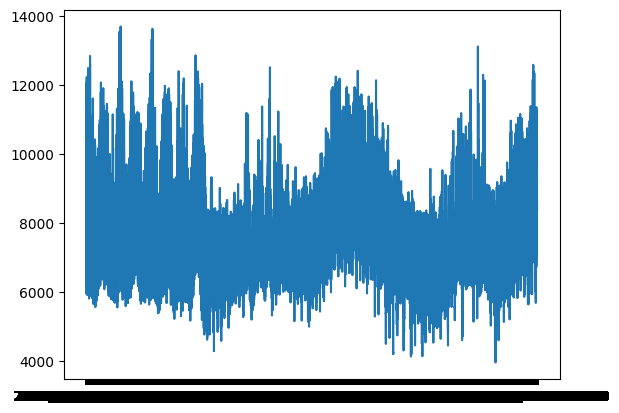

In [5]:
plt.plot(df['SETTLEMENTDATE'], df['TOTALDEMAND'])

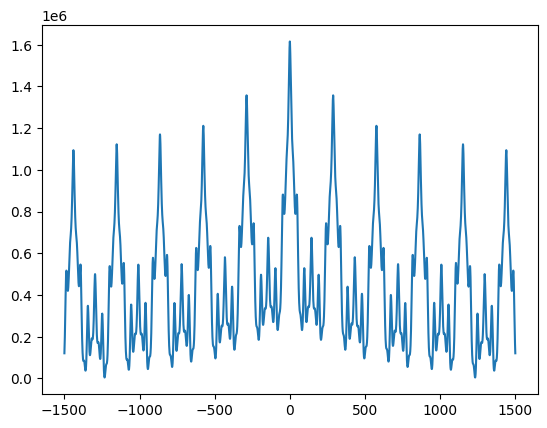

In [49]:
plt.plot(range(-1500,1501), [cov_auto_samp(df['TOTALDEMAND'].values, np.abs(delta)) for delta in range(-1500,1501)])

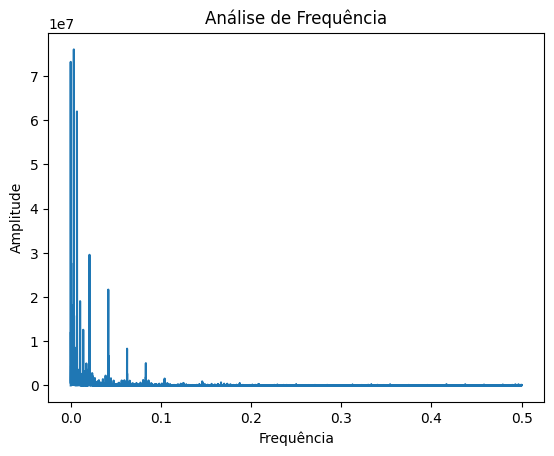

In [7]:
n = len(df['TOTALDEMAND'].values)
yf = fft(df['TOTALDEMAND'].values - np.mean(df['TOTALDEMAND']))  # Remova a média para evitar interferência
xf = fftfreq(n, d=1)  # d=1 assume intervalos regulares de tempo

plt.plot(xf[:n//2], np.abs(yf[:n//2]))  # Use apenas a metade positiva do espectro
plt.title("Análise de Frequência")
plt.xlabel("Frequência")
plt.ylabel("Amplitude")
plt.show()

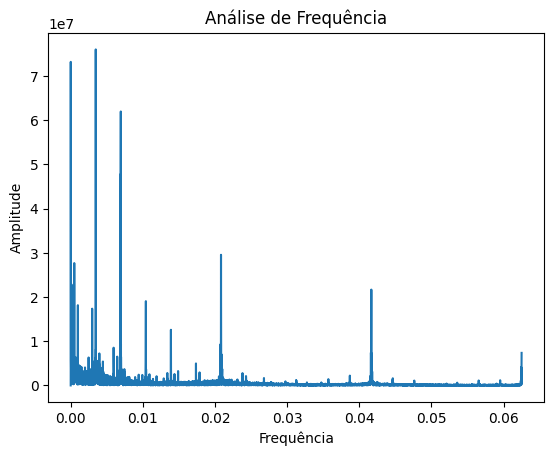

In [10]:
plt.plot(xf[:n//16], np.abs(yf[:n//16]))  # Use apenas a metade positiva do espectro
plt.title("Análise de Frequência")
plt.xlabel("Frequência")
plt.ylabel("Amplitude")
plt.show()

In [13]:
sorted([(i, x) for i, x in enumerate(xf)], key=lambda e: -yf[e[0]])

[(248590, -8.045311192636931e-06),
 (2, 8.045311192636931e-06),
 (248587, -2.011327798159233e-05),
 (5, 2.011327798159233e-05),
 (863, 0.0034715517796228357),
 (247729, -0.0034715517796228357),
 (248564, -0.00011263435669691703),
 (28, 0.00011263435669691703),
 (7, 2.8158589174229258e-05),
 (248585, -2.8158589174229258e-05),
 (2590, 0.010418677994464826),
 (246002, -0.010418677994464826),
 (861, 0.003463506468430199),
 (247731, -0.003463506468430199),
 (27, 0.00010861170110059858),
 (248565, -0.00010861170110059858),
 (247732, -0.0034594838128338807),
 (860, 0.0034594838128338807),
 (248563, -0.0001166570122932355),
 (29, 0.0001166570122932355),
 (10360, 0.041674711977859304),
 (238232, -0.041674711977859304),
 (3453, 0.013890229774087662),
 (245139, -0.013890229774087662),
 (1723, 0.006931035592456716),
 (246869, -0.006931035592456716),
 (248575, -6.838514513741392e-05),
 (17, 6.838514513741392e-05),
 (5181, 0.02084137864452597),
 (243411, -0.02084137864452597),
 (124, 0.0004988092939

Média: 7609.351612240136
Mediana: 7470.85
Variância: 1615241.721855815
Assimetria: 0.6662521026653976
Curtose: 0.5133909596559425
Mínimo: 3957.32
Máximo: 13700.9


(array([ 1216., 12512., 62210., 79476., 54076., 23152., 11207.,  3917.,
          733.,    93.]),
 array([ 3957.32 ,  4931.678,  5906.036,  6880.394,  7854.752,  8829.11 ,
         9803.468, 10777.826, 11752.184, 12726.542, 13700.9  ]),
 <BarContainer object of 10 artists>)

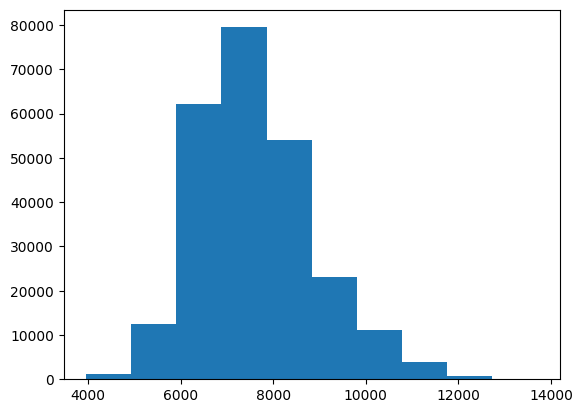

In [51]:
import scipy
print('Média:', np.mean(df['TOTALDEMAND']))
print('Mediana:', np.median(df['TOTALDEMAND']))
print('Variância:', np.var(df['TOTALDEMAND']))
print('Assimetria:', scipy.stats.skew(df['TOTALDEMAND']))
print('Curtose:', scipy.stats.kurtosis(df['TOTALDEMAND']))
print('Mínimo:', np.min(df['TOTALDEMAND']))
print('Máximo:', np.max(df['TOTALDEMAND']))
plt.hist(df['TOTALDEMAND'])

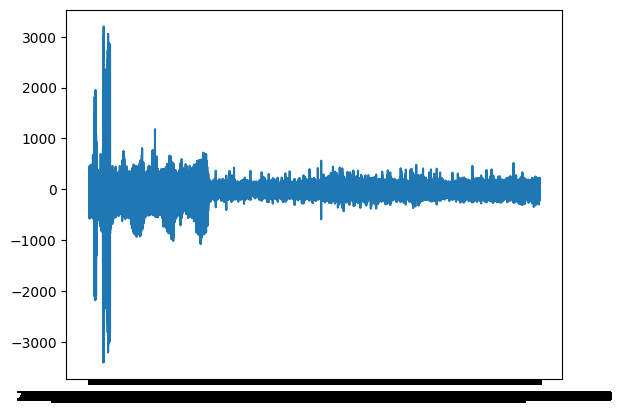

In [52]:
diff_1 = df['TOTALDEMAND'].values[:-1] - df['TOTALDEMAND'].values[1:]
plt.plot(df['SETTLEMENTDATE'].values[1:], diff_1)

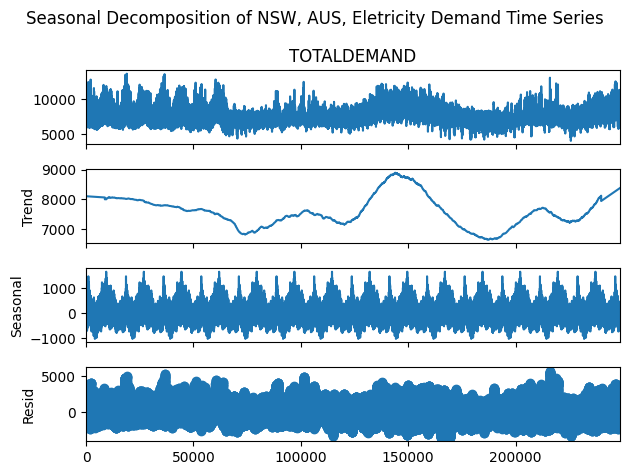

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
# df['Date'] = pd.to_datetime(df['Date'].values)
result = seasonal_decompose(df['TOTALDEMAND'], model='additive', extrapolate_trend='freq', period=48*365)
result.plot()
plt.suptitle('Seasonal Decomposition of NSW, AUS, Eletricity Demand Time Series')
plt.tight_layout()
plt.show()

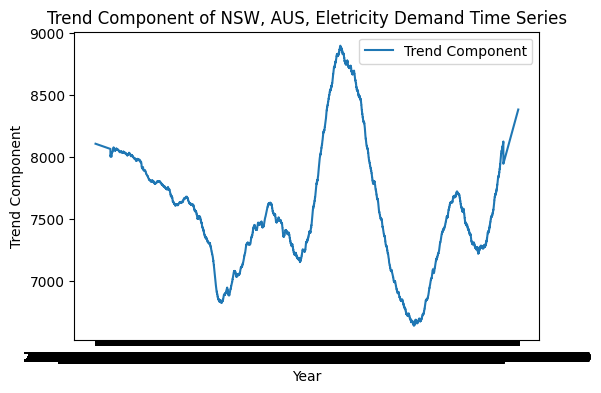

In [13]:
# Plot the trend component
plt.figure(figsize=(6, 4))
plt.plot(df['SETTLEMENTDATE'], result.trend, label='Trend Component')
plt.title('Trend Component of NSW, AUS, Eletricity Demand Time Series')
plt.xlabel('Year')
plt.ylabel('Trend Component')
plt.legend()
plt.show()

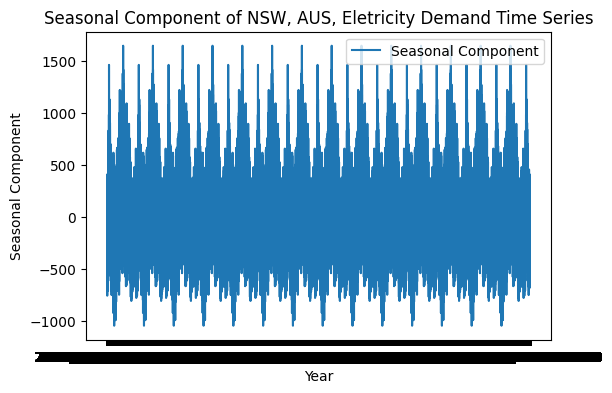

In [15]:
plt.figure(figsize=(6, 4))
plt.plot(df['SETTLEMENTDATE'], result.seasonal, label='Seasonal Component')
plt.title('Seasonal Component of NSW, AUS, Eletricity Demand Time Series')
plt.xlabel('Year')
plt.ylabel('Seasonal Component')
plt.legend()
plt.show()

In [55]:
df['SETTLEMENTDATE']

0         2018/01/01 00:30:00
1         2018/01/01 01:00:00
2         2018/01/01 01:30:00
3         2018/01/01 02:00:00
4         2018/01/01 02:30:00
                 ...         
248587    2023/06/27 23:40:00
248588    2023/06/27 23:45:00
248589    2023/06/27 23:50:00
248590    2023/06/27 23:55:00
248591    2023/06/28 00:00:00
Name: SETTLEMENTDATE, Length: 248592, dtype: object

In [56]:
pd.Series(pd.to_datetime(df['SETTLEMENTDATE']).values[1:]-pd.to_datetime(df['SETTLEMENTDATE']).values[:-1]).value_counts()

0 days 00:05:00      182880
0 days 00:30:00       64478
0 days 01:00:00         372
-1 days +22:30:00       328
0 days 02:00:00         318
0 days 01:30:00          51
-1 days +21:30:00        44
0 days 03:00:00          40
-1 days +23:30:00        28
-1 days +23:00:00        28
0 days 02:30:00          22
-1 days +21:00:00         1
0 days 04:00:00           1
Name: count, dtype: int64

HOUSEHOLD ENERGY DATA

In [3]:
caminho_conjunto_original = r"C:\mestrado\Pesquisa\Dados reais\Dados brutos\KAGGLE - HOUSE HOLD ENERGY CONSUMPTION\D202.csv"
df = pd.read_csv(caminho_conjunto_original)
df['DATE'] = pd.to_datetime(df['DATE'] + df["START TIME"].map(lambda x: ' ' + x.split(':')[0] + 'h'))

In [5]:
df

,TYPE,DATE,START TIME,END TIME,USAGE,UNITS,COST,NOTES
0,Electric usage,2016-10-22 00:00:00,0:00,0:14,0.01,kWh,$0.00,NaN
1,Electric usage,2016-10-22 00:00:00,0:15,0:29,0.01,kWh,$0.00,NaN
2,Electric usage,2016-10-22 00:00:00,0:30,0:44,0.01,kWh,$0.00,NaN
3,Electric usage,2016-10-22 00:00:00,0:45,0:59,0.01,kWh,$0.00,NaN
4,Electric usage,2016-10-22 01:00:00,1:00,1:14,0.01,kWh,$0.00,NaN
...,...,...,...,...,...,...,...,...
70363,Electric usage,2018-10-24 22:00:00,22:45,22:59,0.02,kWh,$0.00,NaN
70364,Electric usage,2018-10-24 23:00:00,23:00,23:14,0.03,kWh,$0.01,NaN
70365,Electric usage,2018-10-24 23:00:00,23:15,23:29,0.03,kWh,$0.01,NaN
70366,Electric usage,2018-10-24 23:00:00,23:30,23:44,0.03,kWh,$0.01,NaN


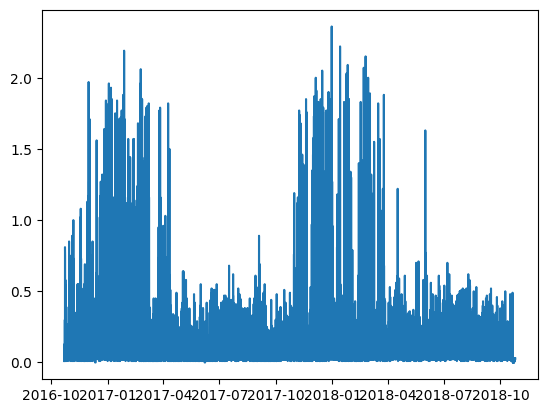

In [6]:
plt.plot(df['DATE'], df['USAGE'])

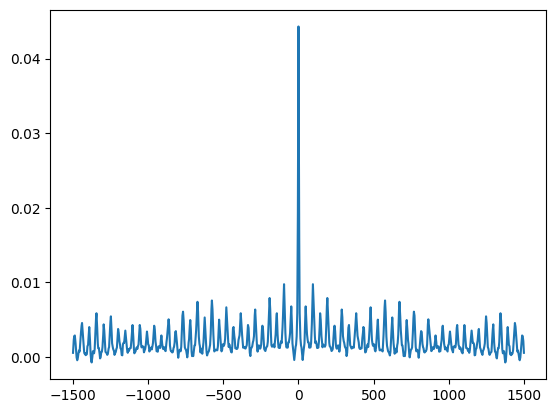

In [7]:
plt.plot(range(-1500,1501), [cov_auto_samp(df['USAGE'].values, np.abs(delta)) for delta in range(-1500,1501)])

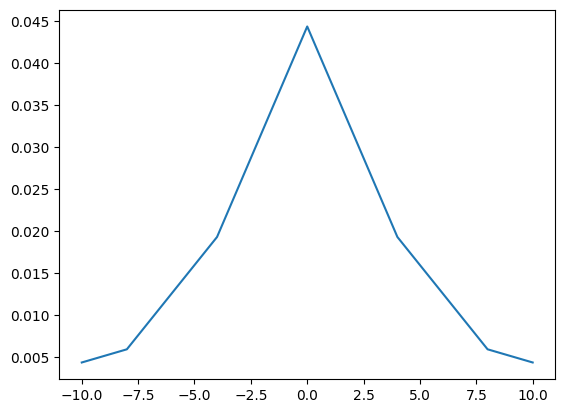

In [8]:
plt.plot(range(-10,11), [cov_auto_samp(df['USAGE'].values, np.abs(delta)) for delta in range(-10,11)])

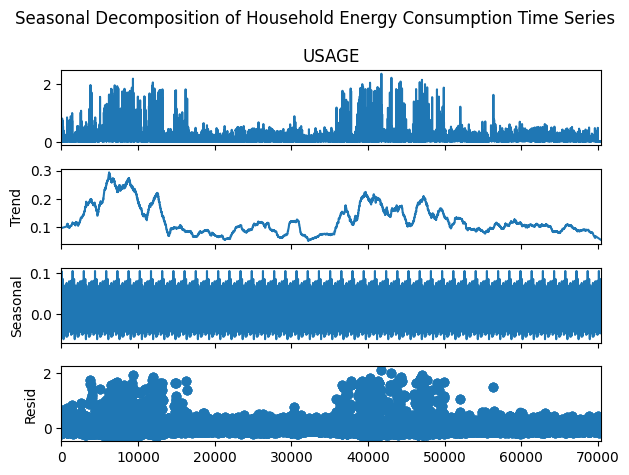

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
# df['Date'] = pd.to_datetime(df['Date'].values)
result = seasonal_decompose(df['USAGE'], model='additive', extrapolate_trend='freq', period=4*365)
result.plot()
plt.suptitle('Seasonal Decomposition of Household Energy Consumption Time Series')
plt.tight_layout()
plt.show()

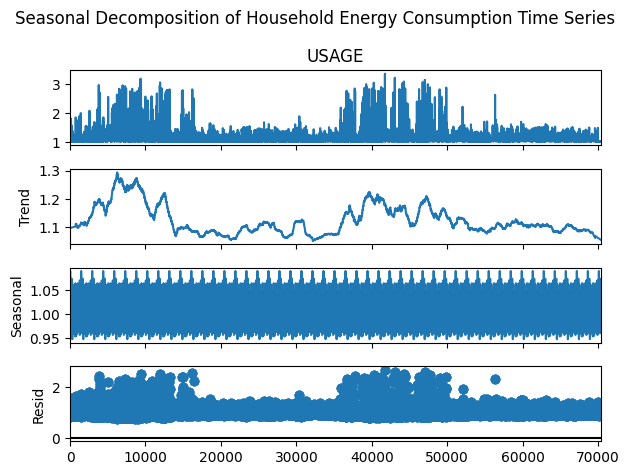

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
# df['Date'] = pd.to_datetime(df['Date'].values)
result = seasonal_decompose(df['USAGE'].map(lambda x: x+1), model='multiplicative', extrapolate_trend='freq', period=4*365)
result.plot()
plt.suptitle('Seasonal Decomposition of Household Energy Consumption Time Series')
plt.tight_layout()
plt.show()

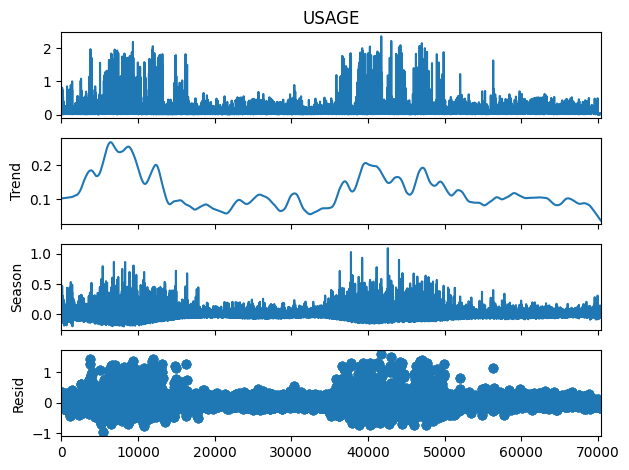

In [13]:
from statsmodels.tsa.seasonal import STL
stl = STL(df['USAGE'], period=4*365)  # Substitua por períodos alternativos conforme necessário
result = stl.fit()
result.plot()
plt.show()

Média: 0.1219406548431105
Mediana: 0.05
Variância: 0.044312536723718515
Assimetria: 4.82514503471711
Curtose: 29.89420884383083
Mínimo: 0.0
Máximo: 2.36


(array([6.0704e+04, 7.1040e+03, 9.8400e+02, 4.1600e+02, 4.1200e+02,
        2.5600e+02, 1.7600e+02, 2.3600e+02, 6.4000e+01, 1.6000e+01]),
 array([0.   , 0.236, 0.472, 0.708, 0.944, 1.18 , 1.416, 1.652, 1.888,
        2.124, 2.36 ]),
 <BarContainer object of 10 artists>)

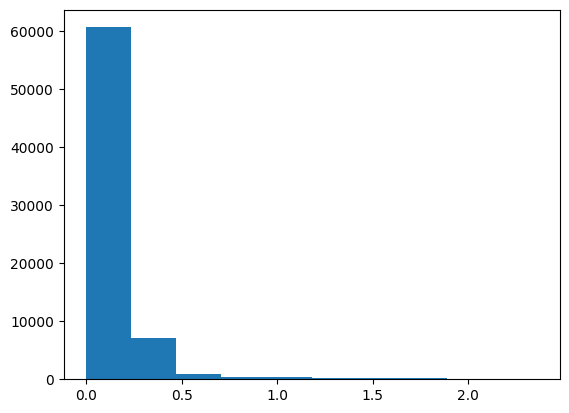

In [60]:
import scipy
print('Média:', np.mean(df['USAGE']))
print('Mediana:', np.median(df['USAGE']))
print('Variância:', np.var(df['USAGE']))
print('Assimetria:', scipy.stats.skew(df['USAGE']))
print('Curtose:', scipy.stats.kurtosis(df['USAGE']))
print('Mínimo:', np.min(df['USAGE']))
print('Máximo:', np.max(df['USAGE']))
plt.hist(df['USAGE'])

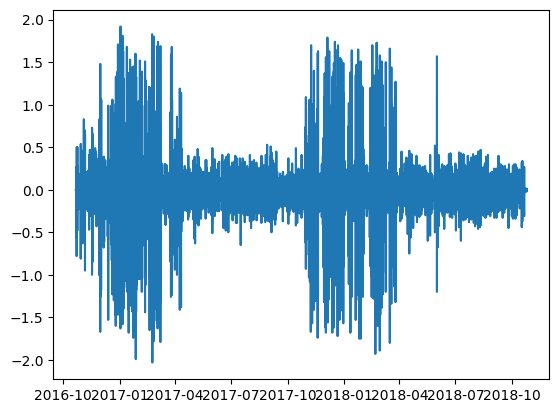

In [61]:
diff_1 = df['USAGE'].values[:-1] - df['USAGE'].values[1:]
plt.plot(df['DATE'].values[1:], diff_1)

BRL/USD

In [54]:
caminho_conjunto_original = r"C:\mestrado\Pesquisa\Dados reais\Dados brutos\BRL_USD Dados Históricos.csv"
df = pd.read_csv(caminho_conjunto_original)
df['Data'] = pd.to_datetime(df['Data'], format="%d.%m.%Y")
df['Último'] = df['Último'].str.replace(',','.').astype(float)

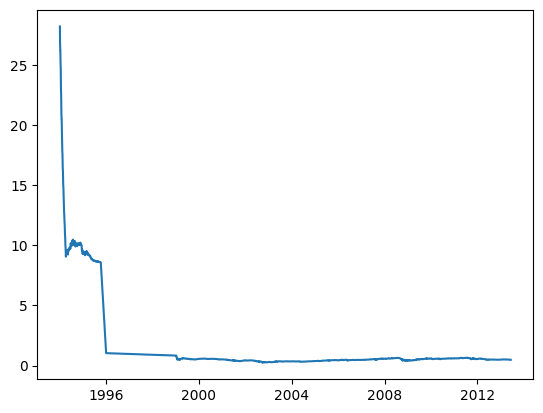

In [55]:
plt.plot(df['Data'], df['Último'])

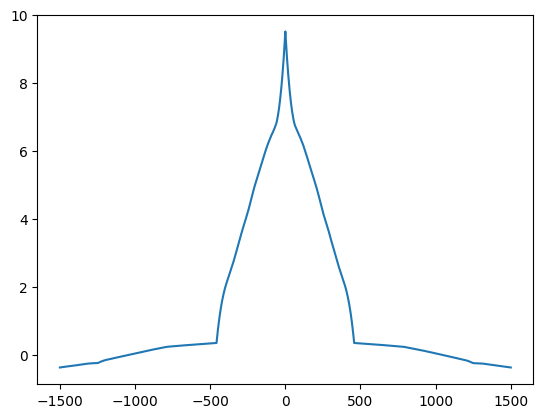

In [56]:
plt.plot(range(-1500,1501), [cov_auto_samp(df['Último'].values, np.abs(delta)) for delta in range(-1500,1501)])

Média: 1.4727523200000003
Mediana: 0.53885
Variância: 9.511105392338617
Assimetria: 3.814992411688643
Curtose: 17.327565823524683
Mínimo: 0.2532
Máximo: 28.1827


(array([4542.,    0.,   32.,  370.,   14.,   11.,    9.,    8.,    6.,
           8.]),
 array([ 0.2532 ,  3.04615,  5.8391 ,  8.63205, 11.425  , 14.21795,
        17.0109 , 19.80385, 22.5968 , 25.38975, 28.1827 ]),
 <BarContainer object of 10 artists>)

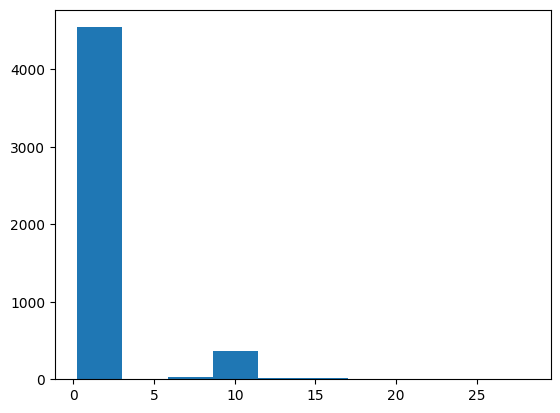

In [57]:
import scipy
print('Média:', np.mean(df['Último']))
print('Mediana:', np.median(df['Último']))
print('Variância:', np.var(df['Último']))
print('Assimetria:', scipy.stats.skew(df['Último']))
print('Curtose:', scipy.stats.kurtosis(df['Último']))
print('Mínimo:', np.min(df['Último']))
print('Máximo:', np.max(df['Último']))
plt.hist(df['Último'])

Bitcoin

In [61]:
caminho_conjunto_original = r"C:\mestrado\Pesquisa\Dados reais\Dados brutos\Dados Históricos - Bitcoin.csv"
df = pd.read_csv(caminho_conjunto_original)
df['Data'] = pd.to_datetime(df['Data'], format="%d.%m.%Y")
df['Último'] = df['Último'].map(lambda x: x.replace('.', '').replace(',','.')).astype(float)

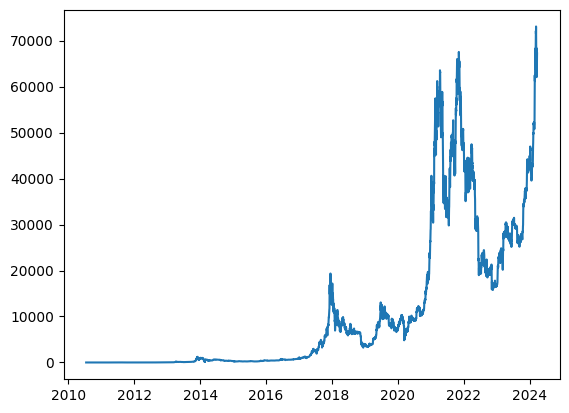

In [62]:
plt.plot(df['Data'], df['Último'])

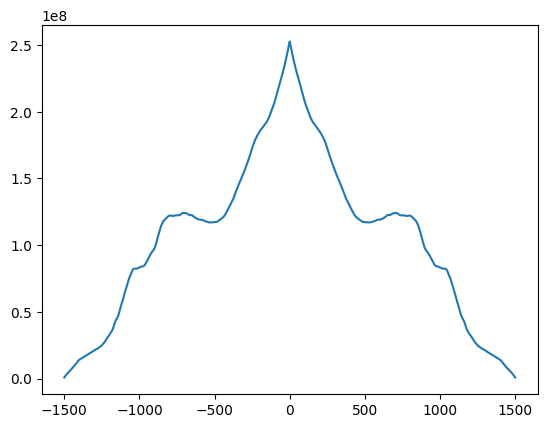

In [63]:
plt.plot(range(-1500,1501), [cov_auto_samp(df['Último'].values, np.abs(delta)) for delta in range(-1500,1501)])

Média: 10812.283336667333
Mediana: 1975.1
Variância: 252506174.52827802
Assimetria: 1.6354089226036101
Curtose: 1.7445896155676381
Mínimo: 0.1
Máximo: 73066.3


(array([3076.,  661.,  264.,  263.,  186.,  230.,  150.,   90.,   61.,
          18.]),
 array([1.000000e-01, 7.306720e+03, 1.461334e+04, 2.191996e+04,
        2.922658e+04, 3.653320e+04, 4.383982e+04, 5.114644e+04,
        5.845306e+04, 6.575968e+04, 7.306630e+04]),
 <BarContainer object of 10 artists>)

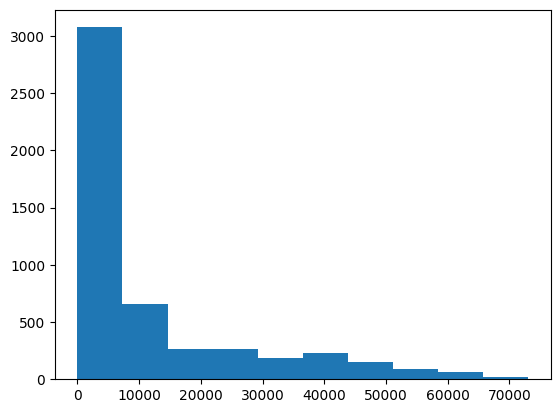

In [60]:
import scipy
print('Média:', np.mean(df['Último']))
print('Mediana:', np.median(df['Último']))
print('Variância:', np.var(df['Último']))
print('Assimetria:', scipy.stats.skew(df['Último']))
print('Curtose:', scipy.stats.kurtosis(df['Último']))
print('Mínimo:', np.min(df['Último']))
print('Máximo:', np.max(df['Último']))
plt.hist(df['Último'])

EUR/USD

In [64]:
caminho_conjunto_original = r"C:\mestrado\Pesquisa\Dados reais\Dados brutos\EUR_USD Dados Históricos.csv"
df = pd.read_csv(caminho_conjunto_original)
df['Data'] = pd.to_datetime(df['Data'], format="%d.%m.%Y")
df['Último'] = df['Último'].map(lambda x: x.replace('.', '').replace(',','.')).astype(float)

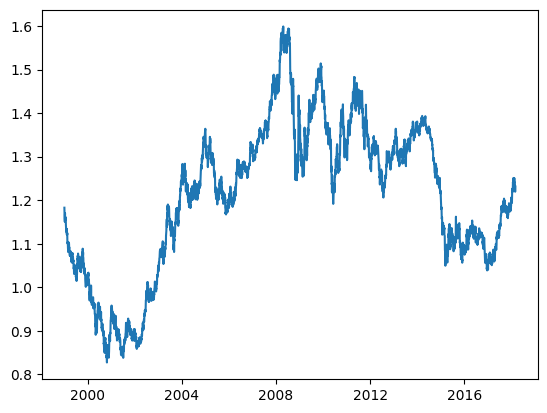

In [65]:
plt.plot(df['Data'], df['Último'])

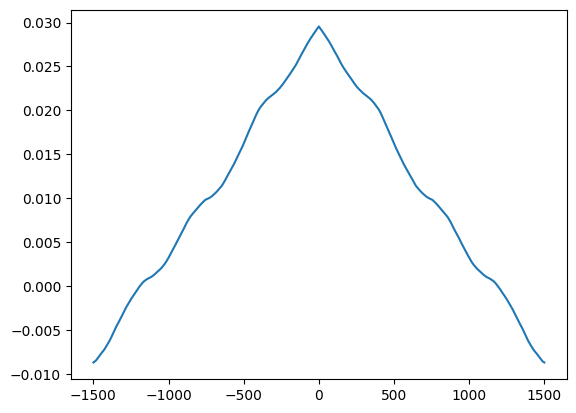

In [66]:
plt.plot(range(-1500,1501), [cov_auto_samp(df['Último'].values, np.abs(delta)) for delta in range(-1500,1501)])

Média: 1.20847878
Mediana: 1.232
Variância: 0.029547770191711595
Assimetria: -0.2808454140560741
Curtose: -0.6232850638291874
Mínimo: 0.8273
Máximo: 1.5988


(array([ 354.,  304.,  299.,  792.,  556.,  810., 1057.,  505.,  210.,
         113.]),
 array([0.8273 , 0.90445, 0.9816 , 1.05875, 1.1359 , 1.21305, 1.2902 ,
        1.36735, 1.4445 , 1.52165, 1.5988 ]),
 <BarContainer object of 10 artists>)

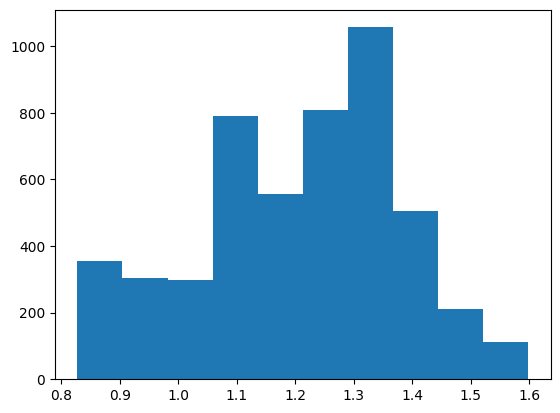

In [67]:
import scipy
print('Média:', np.mean(df['Último']))
print('Mediana:', np.median(df['Último']))
print('Variância:', np.var(df['Último']))
print('Assimetria:', scipy.stats.skew(df['Último']))
print('Curtose:', scipy.stats.kurtosis(df['Último']))
print('Mínimo:', np.min(df['Último']))
print('Máximo:', np.max(df['Último']))
plt.hist(df['Último'])

GBP/USD

In [68]:
caminho_conjunto_original = r"C:\mestrado\Pesquisa\Dados reais\Dados brutos\GBP_USD Dados Históricos.csv"
df = pd.read_csv(caminho_conjunto_original)
df['Data'] = pd.to_datetime(df['Data'], format="%d.%m.%Y")
df['Último'] = df['Último'].map(lambda x: x.replace('.', '').replace(',','.')).astype(float)

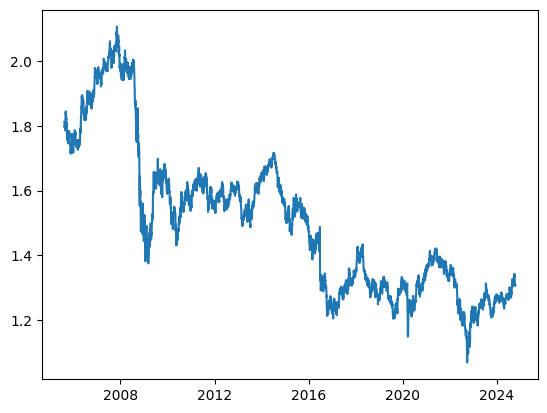

In [69]:
plt.plot(df['Data'], df['Último'])

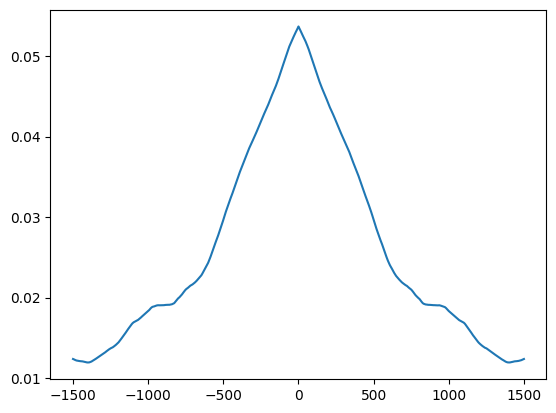

In [70]:
plt.plot(range(-1500,1501), [cov_auto_samp(df['Último'].values, np.abs(delta)) for delta in range(-1500,1501)])

Média: 1.50348762
Mediana: 1.50115
Variância: 0.05368079373273559
Assimetria: 0.6532622249840526
Curtose: -0.41995192831995354
Mínimo: 1.0684
Máximo: 2.1078


(array([  58.,  876., 1044.,  454.,  892.,  805.,  224.,  178.,  342.,
         127.]),
 array([1.0684 , 1.17234, 1.27628, 1.38022, 1.48416, 1.5881 , 1.69204,
        1.79598, 1.89992, 2.00386, 2.1078 ]),
 <BarContainer object of 10 artists>)

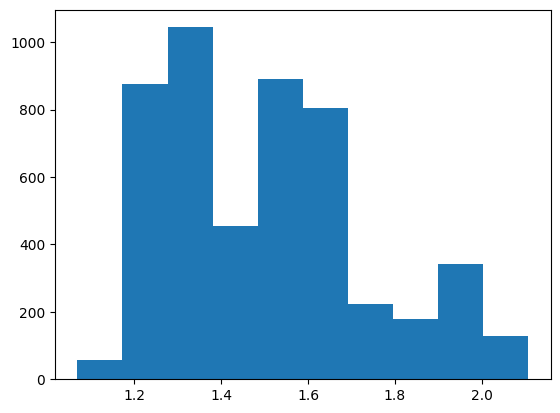

In [71]:
import scipy
print('Média:', np.mean(df['Último']))
print('Mediana:', np.median(df['Último']))
print('Variância:', np.var(df['Último']))
print('Assimetria:', scipy.stats.skew(df['Último']))
print('Curtose:', scipy.stats.kurtosis(df['Último']))
print('Mínimo:', np.min(df['Último']))
print('Máximo:', np.max(df['Último']))
plt.hist(df['Último'])

USD/CHF

In [72]:
caminho_conjunto_original = r"C:\mestrado\Pesquisa\Dados reais\Dados brutos\USD_CHF Dados Históricos.csv"
df = pd.read_csv(caminho_conjunto_original)
df['Data'] = pd.to_datetime(df['Data'], format="%d.%m.%Y")
df['Último'] = df['Último'].map(lambda x: x.replace('.', '').replace(',','.')).astype(float)

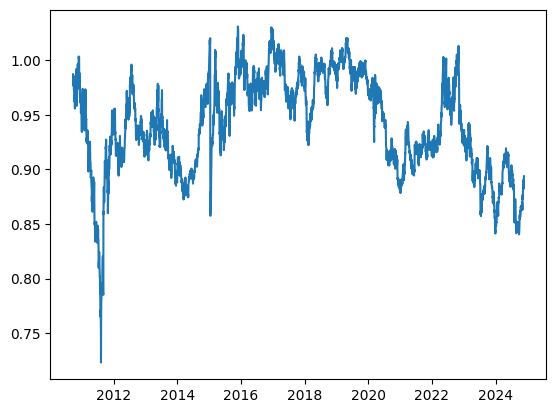

In [73]:
plt.plot(df['Data'], df['Último'])

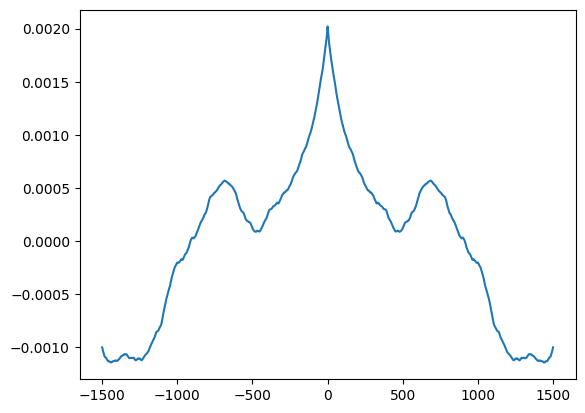

In [74]:
plt.plot(range(-1500,1501), [cov_auto_samp(df['Último'].values, np.abs(delta)) for delta in range(-1500,1501)])

Média: 0.9408798539751217
Mediana: 0.942
Variância: 0.0020206853783453615
Assimetria: -0.4971906458967326
Curtose: 0.18314725078351834
Mínimo: 0.7232
Máximo: 1.0308


(array([  2.,   9.,  21.,  46., 173., 620., 909., 724., 937., 257.]),
 array([0.7232 , 0.75396, 0.78472, 0.81548, 0.84624, 0.877  , 0.90776,
        0.93852, 0.96928, 1.00004, 1.0308 ]),
 <BarContainer object of 10 artists>)

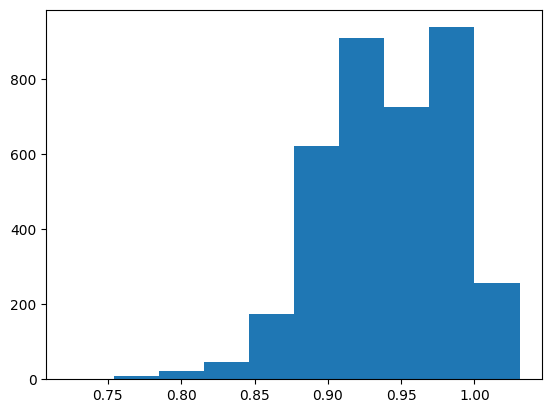

In [75]:
import scipy
print('Média:', np.mean(df['Último']))
print('Mediana:', np.median(df['Último']))
print('Variância:', np.var(df['Último']))
print('Assimetria:', scipy.stats.skew(df['Último']))
print('Curtose:', scipy.stats.kurtosis(df['Último']))
print('Mínimo:', np.min(df['Último']))
print('Máximo:', np.max(df['Último']))
plt.hist(df['Último'])

USD/JPY

In [76]:
caminho_conjunto_original = r"C:\mestrado\Pesquisa\Dados reais\Dados brutos\USD_JPY Dados Históricos.csv"
df = pd.read_csv(caminho_conjunto_original)
df['Data'] = pd.to_datetime(df['Data'], format="%d.%m.%Y")
df['Último'] = df['Último'].map(lambda x: x.replace('.', '').replace(',','.')).astype(float)

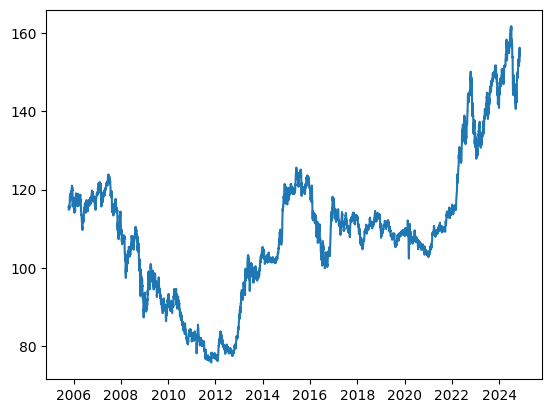

In [77]:
plt.plot(df['Data'], df['Último'])

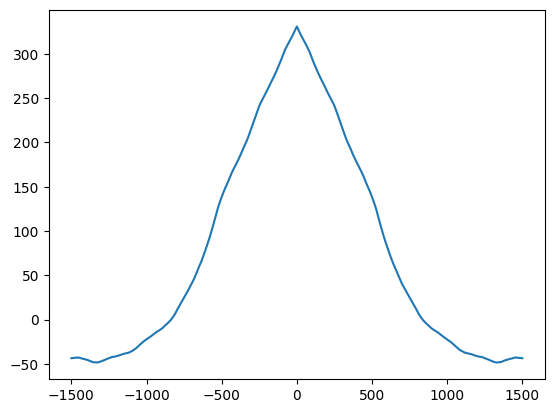

In [78]:
plt.plot(range(-1500,1501), [cov_auto_samp(df['Último'].values, np.abs(delta)) for delta in range(-1500,1501)])

Média: 109.45249598393573
Mediana: 109.38
Variância: 330.9391601756867
Assimetria: 0.42947863963534216
Curtose: 0.2127343747208359
Mínimo: 75.79
Máximo: 161.68


(array([ 592.,  335.,  460., 1298., 1176.,  450.,  160.,  184.,  238.,
          87.]),
 array([ 75.79 ,  84.379,  92.968, 101.557, 110.146, 118.735, 127.324,
        135.913, 144.502, 153.091, 161.68 ]),
 <BarContainer object of 10 artists>)

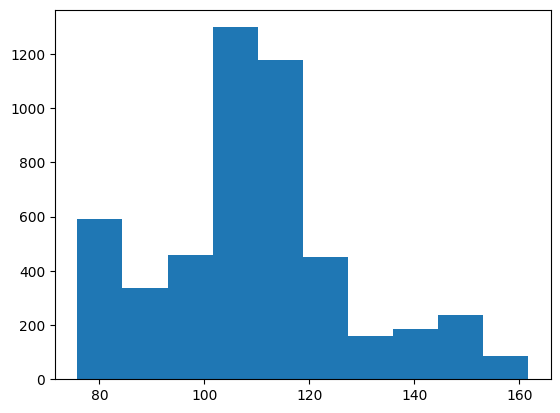

In [79]:
import scipy
print('Média:', np.mean(df['Último']))
print('Mediana:', np.median(df['Último']))
print('Variância:', np.var(df['Último']))
print('Assimetria:', scipy.stats.skew(df['Último']))
print('Curtose:', scipy.stats.kurtosis(df['Último']))
print('Mínimo:', np.min(df['Último']))
print('Máximo:', np.max(df['Último']))
plt.hist(df['Último'])

TESTE ADICIONAL: ONDAS DE ELIOTT EM UMA RETA

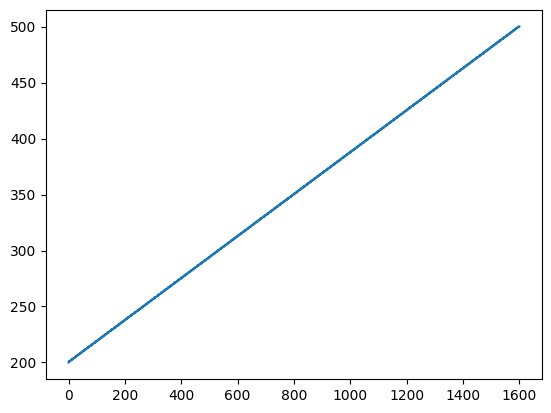

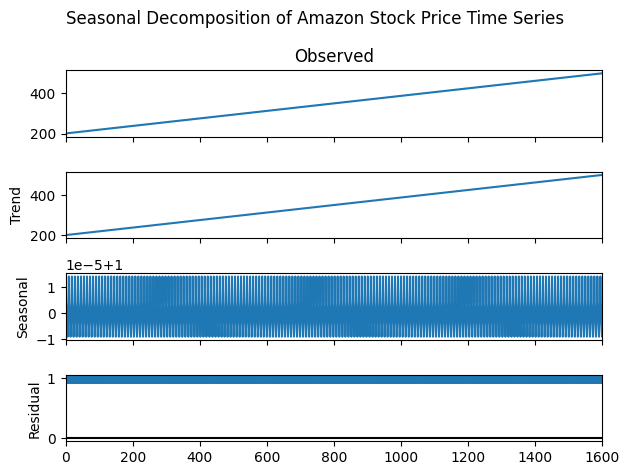

In [80]:
pattern = [1,-0.2,+0.4,-0.2,+0.5,-0.3,+0.4,-0.1]
eliott = [200]
for _ in range(200):
    for d in pattern:
        eliott.append(eliott[-1]+d)
plt.plot(eliott)
result = seasonal_decompose(eliott, model='multiplicative', extrapolate_trend='freq', period=9)
result.plot()
plt.suptitle('Seasonal Decomposition of Amazon Stock Price Time Series')
plt.tight_layout()
plt.show()